# Used Car Sales EDA and Data Cleaning

## Exploratory Data Analysis (EDA)

In [69]:
##Load in data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cars = pd.read_csv('vehicles.csv')

In [88]:
##Explore numerical features
cars.describe(include=[np.number])

,Unnamed: 0,id,price,year,odometer,lat,long
count,458213.000000,4.582130e+05,4.582130e+05,457163.000000,4.029100e+05,450765.000000,450765.000000
mean,229106.000000,7.235233e+09,4.042093e+04,2010.746067,1.016698e+05,38.531925,-94.375824
std,132274.843786,4.594362e+06,8.194599e+06,8.868136,3.228623e+06,5.857378,18.076225
min,0.000000,7.208550e+09,0.000000e+00,1900.000000,0.000000e+00,-82.607549,-164.091797
25%,114553.000000,7.231953e+09,4.900000e+03,2008.000000,4.087700e+04,34.600000,-110.890427
50%,229106.000000,7.236409e+09,1.099500e+04,2013.000000,8.764100e+04,39.244500,-88.314889
75%,343659.000000,7.239321e+09,2.149500e+04,2016.000000,1.340000e+05,42.484503,-81.015022
max,458212.000000,7.241019e+09,3.615215e+09,2021.000000,2.043756e+09,82.049255,150.898969


In [89]:
##Explore categrocial features
cars.describe(include=[object])

,url,region,region_url,manufacturer,model,condition,cylinders,fuel,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,posting_date
count,458213,458213,458213,439993,453367,265273,287073,454976,455636,455771,270664,324025,136865,345475,317370,458185,458143,458213,458185
unique,458213,405,413,43,31520,6,8,5,6,3,133620,3,4,13,12,285404,384347,51,423805
top,https://syracuse.craigslist.org/ctd/d/weedspor...,columbus,https://bend.craigslist.org,ford,f-150,good,6 cylinders,gas,clean,automatic,1C4HJWDG6HL702229,4wd,full-size,sedan,white,https://images.craigslist.org/00c0c_1gCUGosl6w...,"👉 BAD Credit, NO Credit - OKAY! We FINANCE ANY...",ca,2020-11-22T06:14:19-0500
freq,1,3818,2989,79666,8370,115685,105677,399399,439626,396322,194,139693,69736,92364,82786,194,247,51856,7


Text(0, 0.5, 'Frequency')

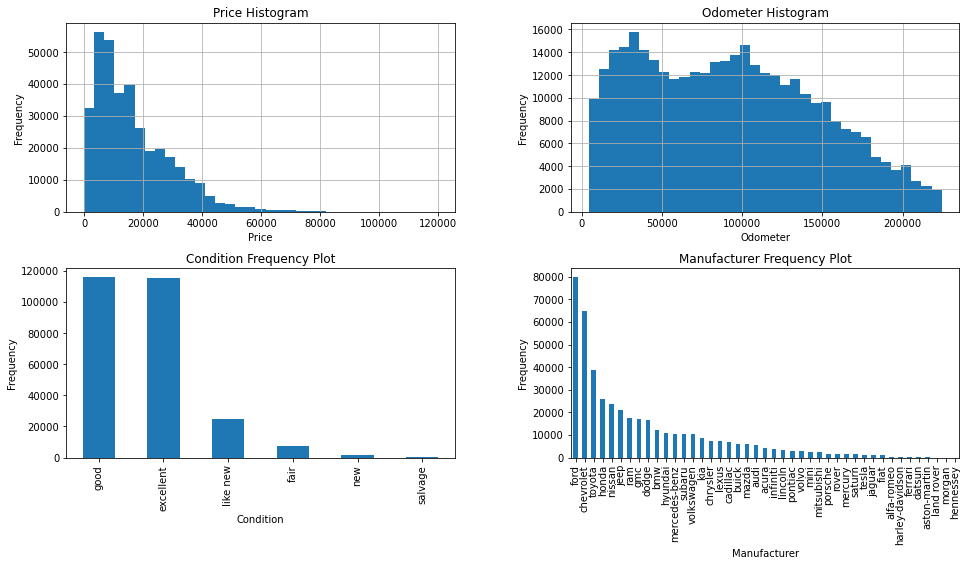

In [163]:
##Visualise the distribtions of important features (removing outliers to see true distributions)

##filter out outliers of price and odometer
price_hi = cars['price'].quantile(0.999)
price_lo = cars['price'].quantile(0.001)

odom_hi = cars_filtered['odometer'].quantile(0.999)
odom_lo = cars_filtered['odometer'].quantile(0.001)

cars_filtered = cars[(cars['price'] < price_hi) & (cars['price'] > price_lo) & (cars['odometer'] < odom_hi) & (cars['odometer'] > odom_lo)]

##Plot distributions
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16,8))

cars_filtered.hist(column='price', bins=35, ax=ax[0][0])
cars_filtered.hist(column='odometer', bins=35, ax=ax[0][1])

cars['condition'].value_counts().plot(kind='bar', ax=ax[1][0])
cars['manufacturer'].value_counts().plot(kind='bar', ax=ax[1][1])

ax[0][0].set_title("Price Histogram")
ax[0][0].set_xlabel("Price")
ax[0][0].set_ylabel("Frequency")

ax[0][1].set_title("Odometer Histogram")
ax[0][1].set_xlabel("Odometer")
ax[0][1].set_ylabel("Frequency")

ax[1][0].set_title("Condition Frequency Plot")
ax[1][0].set_xlabel("Condition")
ax[1][0].set_ylabel("Frequency")

ax[1][1].set_title("Manufacturer Frequency Plot")
ax[1][1].set_xlabel("Manufacturer")
ax[1][1].set_ylabel("Frequency")


Text(0.5, 1.0, 'Odometer vs Price')

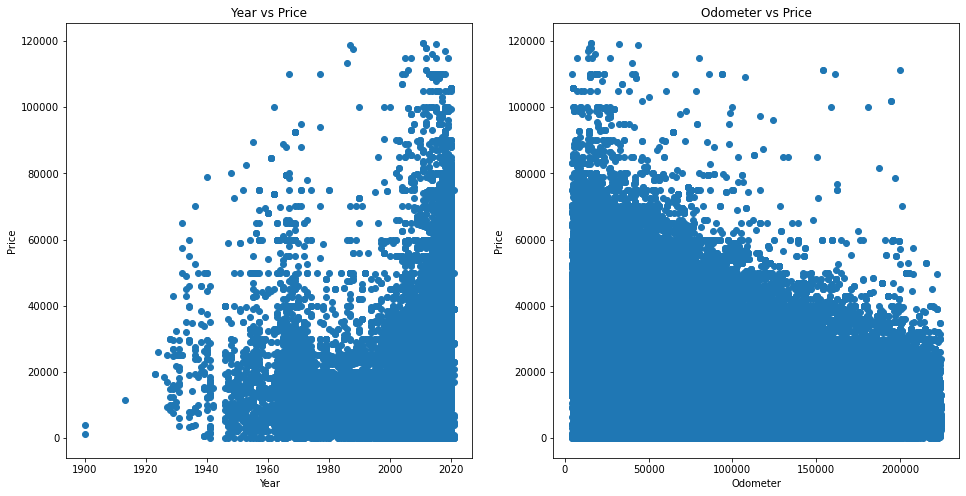

In [164]:
## Visualise some correlations between attributes
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8))

##Price vs year
cars_filtered.plot(x='year', y='price', style='o', ax=ax[0])
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Price")
ax[0].get_legend().remove()
ax[0].set_title("Year vs Price")

##Price vs odometer
cars_filtered.plot(x='odometer', y='price', style='o', ax=ax[1])
ax[1].set_xlabel("Odometer")
ax[1].set_ylabel("Price")
ax[1].get_legend().remove()
ax[1].set_title("Odometer vs Price")

## Data Cleaning

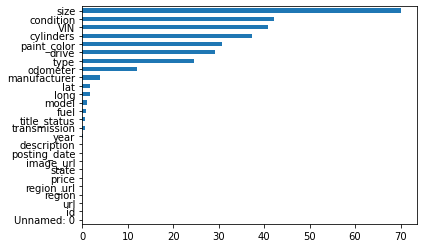

In [126]:
##Visualise the missing data we have
missing = cars.isnull().sum()/len(cars)*100
missing_sorted = missing.sort_values()
missing_sorted.plot.barh(x='Percentage Missing', y='Feature')

In [21]:
##Remove obviously redundant features
cars_dropped = cars.drop(['Unnamed: 0', 'id', 'url', 'region_url', 'image_url', 'VIN', 'description', 'lat', 'long'], axis=1)